In [175]:
from sklearn.datasets import load_iris
import pandas as pd

In [176]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
106,4.9,2.5,4.5,1.7,2
6,4.6,3.4,1.4,0.3,0
104,6.5,3.0,5.8,2.2,2
7,5.0,3.4,1.5,0.2,0
19,5.1,3.8,1.5,0.3,0


In [177]:
print(f"Shape: {iris_df.shape[0]} rows × {iris_df.shape[1]} columns")
print('-'*84+'\n')
print(iris_df.info())
print('-'*84)
display(iris_df.describe())

Shape: 150 rows × 5 columns
------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
------------------------------------------------------------------------------------


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [178]:
from sklearn.model_selection import train_test_split

X = iris_df.iloc[:,0:-1]
y = iris_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train:\n--> Shape: {X_train.shape[0]} rows × {X_train.shape[1]} columns")
print(f"X_test:\n--> Shape: {X_test.shape[0]} rows × {X_test.shape[1]} columns")
print(f"y_train:\n--> Shape: {y_train.shape}")
print(f"y_test:\n--> Shape: {y_test.shape}")

X_train:
--> Shape: 120 rows × 4 columns
X_test:
--> Shape: 30 rows × 4 columns
y_train:
--> Shape: (120,)
y_test:
--> Shape: (30,)


In [179]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline_steps = [
    ('scaler', StandardScaler()),  # Step 1: Feature scaling
    ('classifier', RandomForestClassifier(min_samples_leaf=5))  # Step 2: Classification mode
]

# Build pipeline
pipeline = Pipeline(pipeline_steps)

# Fit on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [180]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5)
print("CV Accuracy:", scores)
print("Mean:", scores.mean(), "Std:", scores.std())

CV Accuracy: [0.96666667 0.96666667 0.93333333 0.9        1.        ]
Mean: 0.9533333333333334 Std: 0.03399346342395189


In [181]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define candidate models
models = {
    "LogReg": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5)
    print(f"{name}: Mean={scores.mean():.2f}, Std={scores.std():.3f}")


LogReg: Mean=0.96, Std=0.039
SVM: Mean=0.97, Std=0.021
RandomForest: Mean=0.96, Std=0.025
KNN: Mean=0.96, Std=0.025


In [182]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(random_state=42))
])

param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_leaf": [1, 3, 5]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid.fit(X, y)

print("Best params:", grid.best_params_)
print("Best CV score:", round(grid.best_score_,2))


Best params: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100}
Best CV score: 0.97


In [183]:
# import matplotlib.pyplot as plt
# import numpy as np

# def plot_decision_boundary(model, X, y, features=(0,1)):
#     X_plot = X.iloc[:, list(features)].values
#     x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
#     y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
#                          np.arange(y_min, y_max, 0.02))
    
#     model.fit(X_plot, y)
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     plt.contourf(xx, yy, Z, alpha=0.3)
#     plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolor="k")
#     plt.xlabel(X.columns[features[0]])
#     plt.ylabel(X.columns[features[1]])
#     plt.show()

# # Example: Logistic Regression on first 2 features
# plot_decision_boundary(LogisticRegression(max_iter=200), X, y, features=(0,1))

In [184]:
# from mlxtend.plotting import plot_decision_regions

# X = iris_df.iloc[:, [0, 1]].values  # sepal length and sepal width
# y = iris_df.iloc[:, -1].values

# models = {
#     "LogReg": LogisticRegression(max_iter=200),
#     "SVM": SVC(),
#     "RandomForest": RandomForestClassifier(
#         max_depth=10,
#         min_samples_leaf=1,
#         n_estimators=100
#     ),
#     "KNN": KNeighborsClassifier()
# }

# for name, model in models.items():
#     pipeline = Pipeline([
#         ("scaler", StandardScaler()),
#         ("classifier", model)
#     ])
#     pipeline.fit(X, y)

#     # Calculate accuracy on training data
#     acc = pipeline.score(X, y) * 100

#     fig, ax = plt.subplots(figsize=(7, 5))
#     plot_decision_regions(X, y, clf=pipeline, legend=2, ax=ax)

#     plt.xlabel('Sepal length')
#     plt.ylabel('Sepal width')
#     plt.title(f'{name} | Accuracy: {acc:.2f}%')
#     plt.show()

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import clone

def plot_decision_boundary_2d(
    estimator,
    X, y,
    features=(2, 3),          # which two columns to plot (Iris: petal length=2, petal width=3)
    grid_step=0.02,           # resolution of the mesh
    pad_ratio=0.10,           # extra space around the min/max
    fit_on="full",            # "full", "train", or pass (X_fit, y_fit) tuple
    title=None,
    show=True,
    ax=None
):
    """
    Plot decision regions for any sklearn estimator (or Pipeline) using two features.

    Parameters
    ----------
    estimator : sklearn estimator or Pipeline
        Must implement fit(X, y) and predict(X).
    X : pandas.DataFrame or ndarray of shape (n_samples, n_features)
    y : array-like of shape (n_samples,)
    features : tuple(int,int)
        Indices of the two columns to use.
    grid_step : float
        Step size for the meshgrid.
    pad_ratio : float
        Fractional padding around min/max for plot bounds.
    fit_on : "full", "train", or (X_fit, y_fit)
        - "full": fit on all (X, y)
        - "train": expects you to have X_train, y_train in scope; will fit on them
        - (X_fit, y_fit): explicitly pass a dataset to fit on
    title : str
        Plot title.
    show : bool
        Whether to call plt.show().
    ax : matplotlib axis
        If provided, draw on this axis.
    """
    # 1) Select the two columns
    if hasattr(X, "iloc"):       # pandas DataFrame
        X2 = X.iloc[:, list(features)].values
        feat_names = [X.columns[features[0]], X.columns[features[1]]]
    else:                        # numpy array
        X2 = X[:, list(features)]
        feat_names = [f"feat_{features[0]}", f"feat_{features[1]}"]

    y = np.asarray(y)

    # 2) Decide what to fit on (never mutate the original estimator)
    est = clone(estimator)

    if fit_on == "full":
        est.fit(X2, y)
    elif fit_on == "train":
        # expects X_train, y_train to exist with the SAME columns as X
        # and we’ll subset them to the chosen 2 features
        if hasattr(X, "iloc"):
            X_fit = X_train.iloc[:, list(features)].values
        else:
            X_fit = X_train[:, list(features)]
        est.fit(X_fit, y_train)
    elif isinstance(fit_on, tuple) and len(fit_on) == 2:
        X_fit_raw, y_fit_raw = fit_on
        if hasattr(X_fit_raw, "iloc"):
            X_fit = X_fit_raw.iloc[:, list(features)].values
        else:
            X_fit = np.asarray(X_fit_raw)[:, list(features)]
        est.fit(X_fit, np.asarray(y_fit_raw))
    else:
        raise ValueError("fit_on must be 'full', 'train', or a (X_fit, y_fit) tuple")

    # 3) Build the meshgrid
    x_min, x_max = X2[:, 0].min(), X2[:, 0].max()
    y_min, y_max = X2[:, 1].min(), X2[:, 1].max()

    x_pad = (x_max - x_min) * pad_ratio
    y_pad = (y_max - y_min) * pad_ratio

    xx, yy = np.meshgrid(
        np.arange(x_min - x_pad, x_max + x_pad, grid_step),
        np.arange(y_min - y_pad, y_max + y_pad, grid_step)
    )

    # 4) Predict on the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = est.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # 5) Plot regions + data points
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))

    # Filled decision regions
    ax.contourf(xx, yy, Z, alpha=0.30, antialiased=True)

    # Training points
    scatter = ax.scatter(X2[:, 0], X2[:, 1], c=y, edgecolor="k", s=50)

    # Axes labels and title
    ax.set_xlabel(feat_names[0])
    ax.set_ylabel(feat_names[1])
    if title:
        ax.set_title(title)

    # Legend (map class indices to labels if possible)
    # If your y are 0/1/2 for Iris, this will show class codes.
    # For named classes, pass y as those names or build a mapping.
    handles, _ = scatter.legend_elements()
    ax.legend(handles, np.unique(y), title="class", loc="best")

    if show:
        plt.show()

    return ax


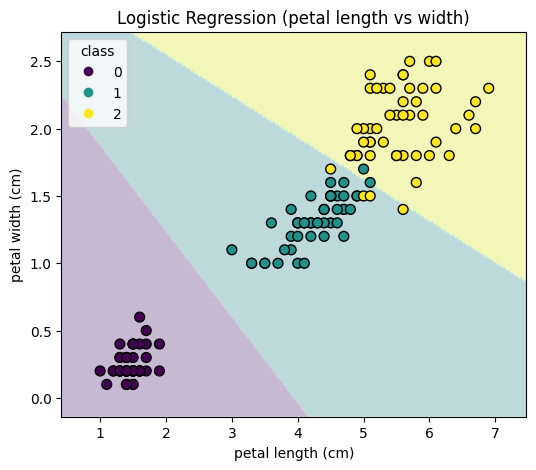

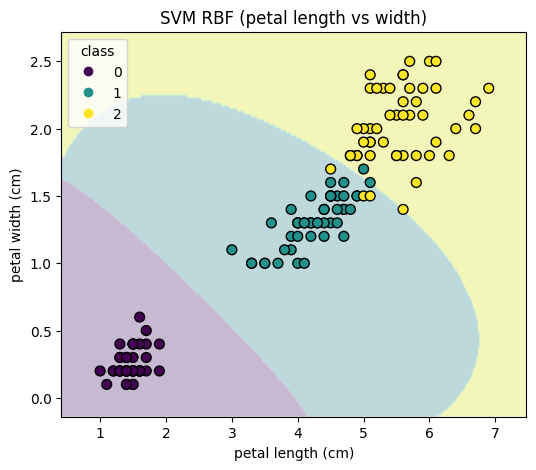

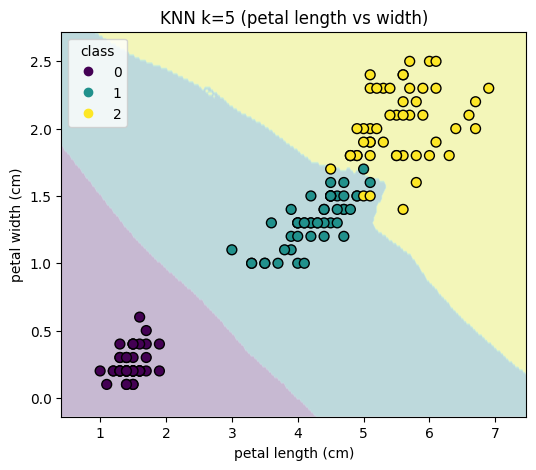

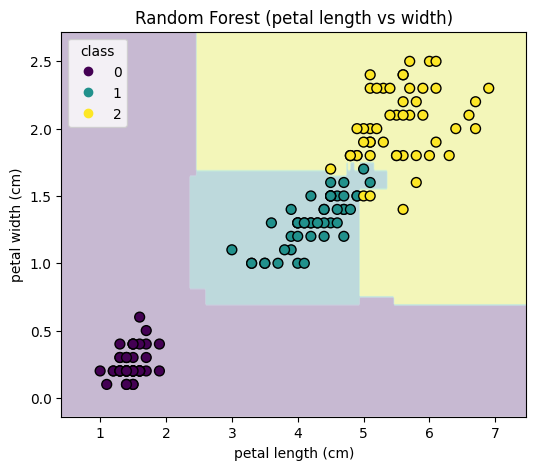

<Axes: title={'center': 'Random Forest (petal length vs width)'}, xlabel='petal length (cm)', ylabel='petal width (cm)'>

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X = iris_df.iloc[:,0:-1]
y = iris_df.iloc[:,-1]

# 1) Logistic Regression (needs scaling)
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500))
])
plot_decision_boundary_2d(
    logreg_pipe, X, y,
    features=(2, 3),
    title="Logistic Regression (petal length vs width)"
)

# 2) SVM with RBF kernel (needs scaling)
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=1.0, gamma="scale"))
])
plot_decision_boundary_2d(
    svm_pipe, X, y,
    features=(2, 3),
    title="SVM RBF (petal length vs width)"
)

# 3) KNN (benefits from scaling)
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=5))
])
plot_decision_boundary_2d(
    knn_pipe, X, y,
    features=(2, 3),
    title="KNN k=5 (petal length vs width)"
)

# 4) Random Forest (scaling not needed, but harmless)
rf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])
plot_decision_boundary_2d(
    rf_pipe, X, y,
    features=(2, 3),
    title="Random Forest (petal length vs width)"
)


d:\Languages\Projects\ml-portfolio\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Languages\Projects\ml-portfolio\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Languages\Projects\ml-portfolio\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Languages\Projects\ml-portfolio\.venv\Lib\site-packages\skle

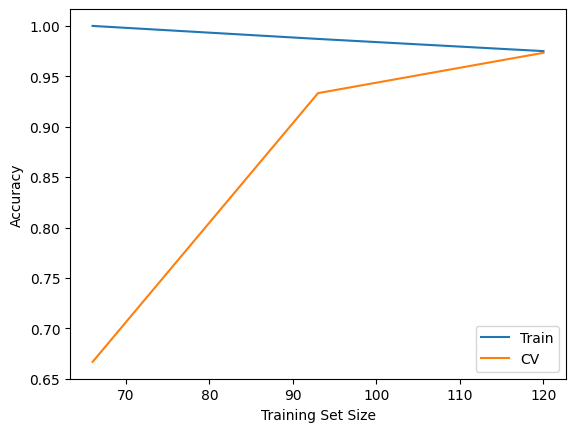

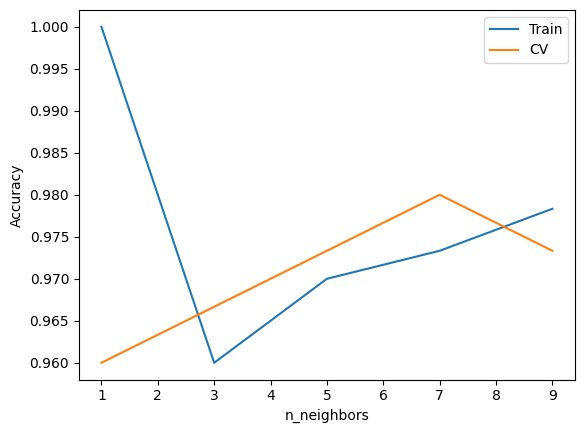

In [187]:
from sklearn.model_selection import learning_curve, validation_curve

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(max_iter=200),
    X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

import matplotlib.pyplot as plt
plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="CV")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Validation curve: vary hyperparameter
param_range = [1, 3, 5, 7, 9]
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X, y, param_name="n_neighbors", param_range=param_range, cv=5
)

plt.plot(param_range, train_scores.mean(axis=1), label="Train")
plt.plot(param_range, test_scores.mean(axis=1), label="CV")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
